# LOFAR OPC UA single station imaging

In [1]:
import os
import sys
import time
import datetime
import glob
import numpy as np

from lofarantpos.db import LofarAntennaDatabase
from lofarimaging import read_acm_cube, get_station_type, make_xst_plots
from lofarantpos.db import LofarAntennaDatabase

In [3]:
xst_filename = r"C:\Users\jorge\OneDrive\Escritorio\BachelorTesis\scripts\lofarimaging\sorted_subbands\subband_283\20230111_072040_xst.h"
# "../data/sess_sid20230111T071252_LV614/scan_59955.30061/LV614_20230111_071256_spw3_sb51_461_int1_dur24300_dir0,0,SUN_xst/20230111_072040_xst.dat"
caltable_dir = "./test/CalTables"

# Read subband from .h file

import re

# Assuming h_filename is already defined
h_filename = xst_filename.replace(".dat", ".h")

# Read the .h file
with open(h_filename, 'r') as file:
    content = file.read()

# Find the subband number using regex
match = re.search(r'--xcsubband=(\d+)', content)
if match:
    subband = int(match.group(1))
else:
    subband = None  # or handle the case where the subband is not found

print("Subband: ", subband)

Subband:  283


In [ ]:
# %time obstime, visibilities, rcu_mode = download_xst(subband, integration_time_s)
# rcu_mode

# cube, calibration_info = apply_calibration(cube, station_name, rcu_mode, subband, caltable_dir=caltable_dir)

In [4]:
import h5py

# Open the HDF5 file
h5file = h5py.File(r"C:\Users\jorge\OneDrive\Escritorio\BachelorTesis\scripts\lofarimaging\imgSameSubband\results.h5", 'r')

# List all observation numbers (group names) in the HDF5 file
obsnums = list(h5file.keys())
print(obsnums)

# Close the HDF5 file
# h5file.close()

['obs000001', 'obs000002', 'obs000003', 'obs000004', 'obs000005', 'obs000006', 'obs000007', 'obs000008', 'obs000009', 'obs000010', 'obs000011', 'obs000012', 'obs000013', 'obs000014', 'obs000015', 'obs000016', 'obs000017', 'obs000018', 'obs000019', 'obs000020', 'obs000021', 'obs000022', 'obs000023', 'obs000024', 'obs000025', 'obs000026', 'obs000027', 'obs000028', 'obs000029', 'obs000030', 'obs000031', 'obs000032', 'obs000033', 'obs000034', 'obs000035', 'obs000036', 'obs000037', 'obs000038', 'obs000039', 'obs000040', 'obs000041', 'obs000042', 'obs000043', 'obs000044', 'obs000045', 'obs000046', 'obs000047', 'obs000048', 'obs000049', 'obs000050', 'obs000051', 'obs000052', 'obs000053', 'obs000054', 'obs000055', 'obs000056', 'obs000057', 'obs000058', 'obs000059', 'obs000060', 'obs000061', 'obs000062', 'obs000063', 'obs000064', 'obs000065', 'obs000066', 'obs000067', 'obs000068', 'obs000069', 'obs000070', 'obs000071', 'obs000072', 'obs000073', 'obs000074', 'obs000075', 'obs000076', 'obs000077'

100%|██████████| 89/89 [00:03<00:00, 24.23it/s]


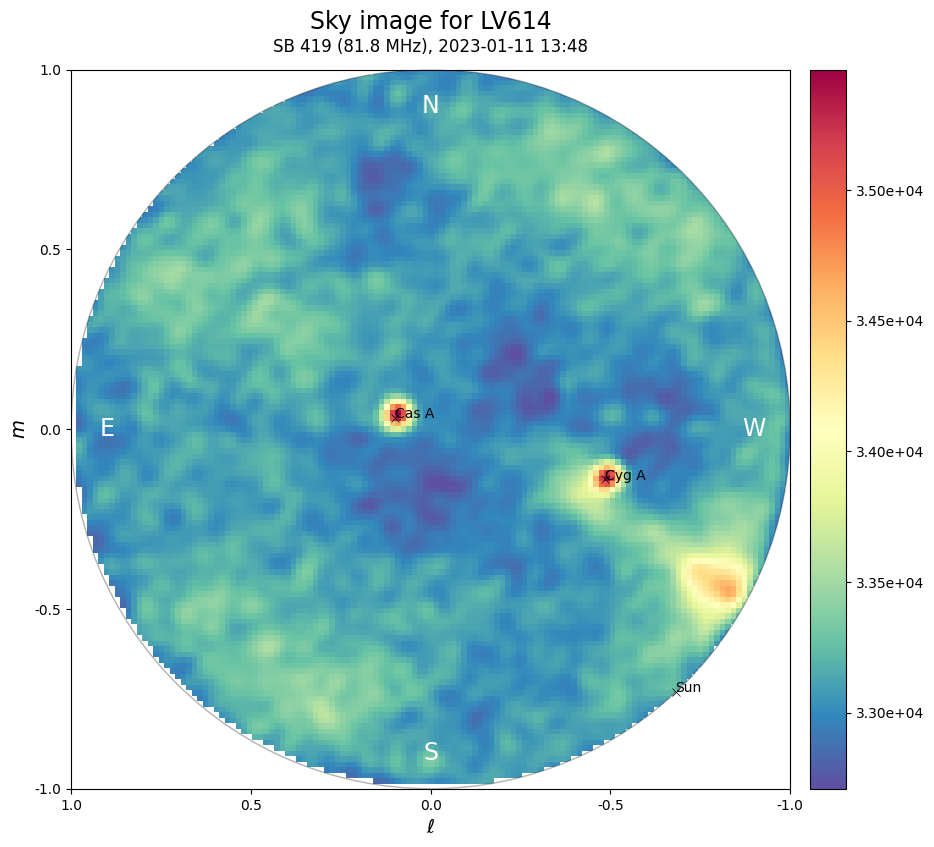

In [5]:
from lofarimaging import make_sky_movie
make_sky_movie('movieForSubbands263164419.mp4', h5file, obsnums)

In [ ]:
station_name = "LV614"
integration_time_s = 2
rcu_mode = 3
station_type = get_station_type(station_name)
obsdatestr, obstimestr, *_ = os.path.basename(xst_filename).rstrip(".dat").split("_")
obstime = datetime.datetime.strptime(obsdatestr + ":" + obstimestr, '%Y%m%d:%H%M%S')
visibilities = read_acm_cube(xst_filename, station_type)[0]
# sky_fig, ground_fig, leaflet_map = make_xst_plots(cube[0, :, :], station_name, obstime, subband, rcu_mode, subtract=["Cyg A","Cas A", "Sun"])
sky_fig, ground_fig, leaflet_map = make_xst_plots(visibilities, station_name, obstime, subband, rcu_mode, outputpath="./video")

Maximum at 102m east, -150m north of station center (lat/long 57.55553, 21.85662)


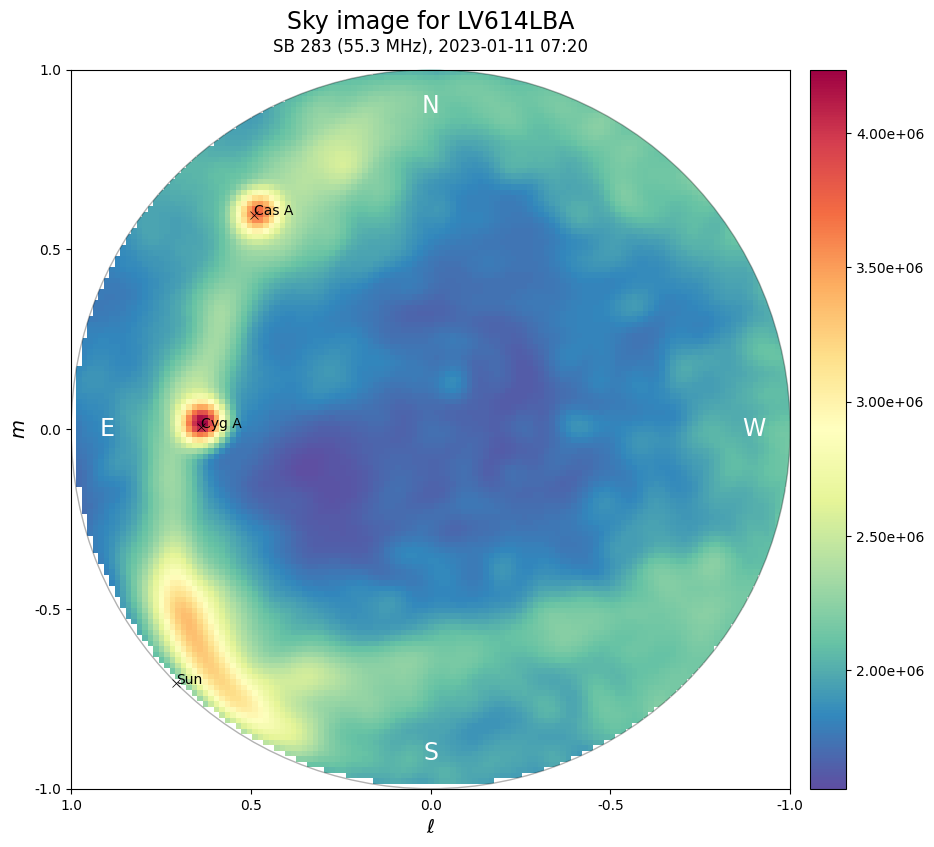

In [ ]:
sky_fig

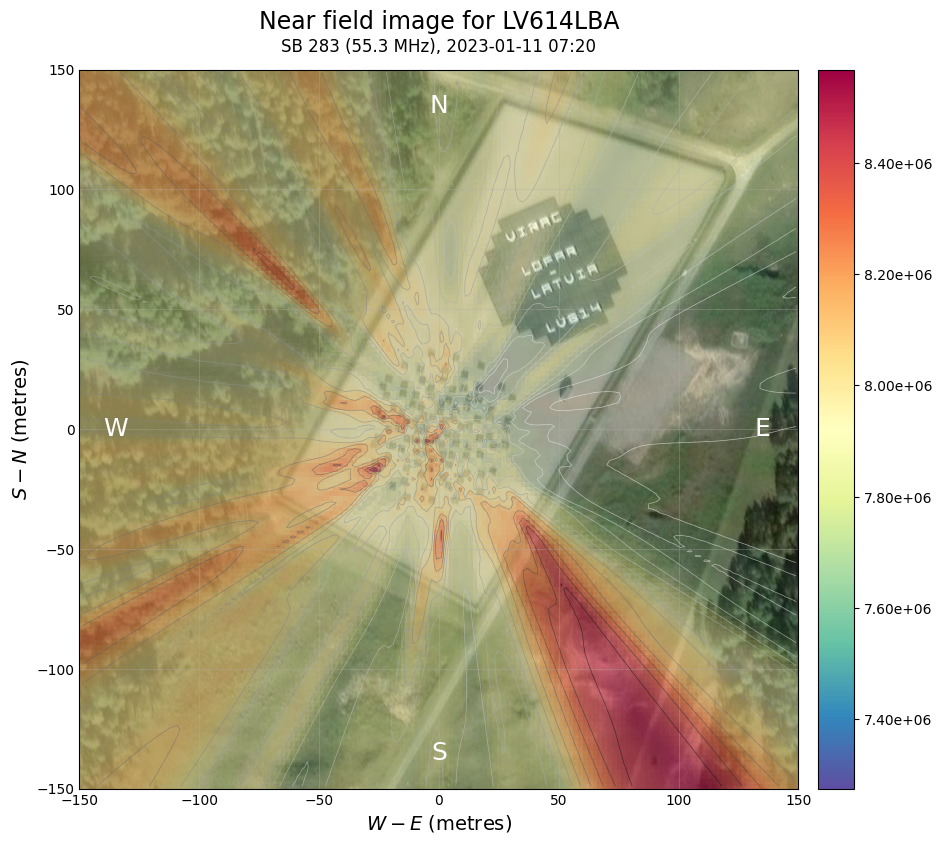

In [ ]:
ground_fig


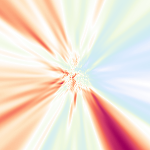

In [ ]:
leaflet_map